In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, Normalizer, OrdinalEncoder, scale
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector

from sklearn.linear_model import ElasticNet

sns.set_theme(style="darkgrid")

In [368]:
df = pd.read_csv('possum.csv')
df.head(20)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


<AxesSubplot:xlabel='Pop', ylabel='count'>

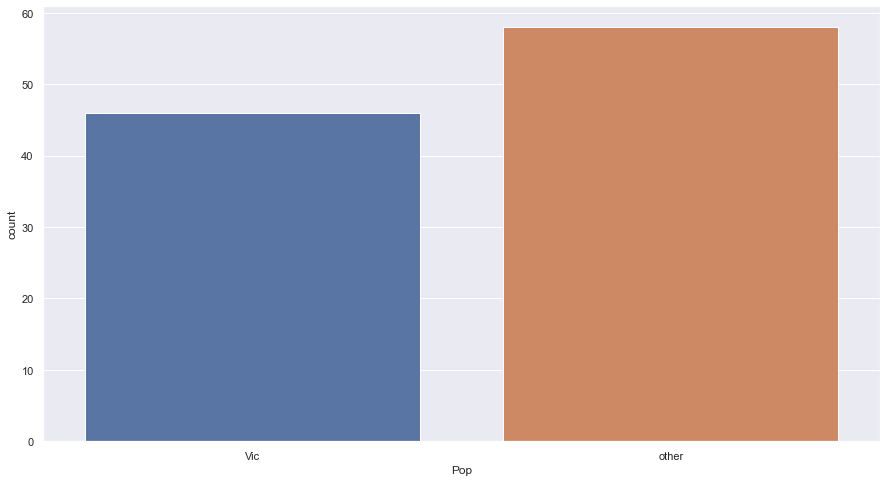

In [369]:
fig, axs = plt.subplots(figsize=(15, 8))
sns.countplot(ax = axs, data=df, x='Pop')

In [370]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [371]:
df = df.dropna()
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [372]:
df.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [373]:
cols = df.columns

## Object of prediction - belly

In [374]:
column_transformer = ColumnTransformer([('numerical', StandardScaler(), make_column_selector(dtype_include=np.number)),
                                        ('categorical', OneHotEncoder(drop='first'), make_column_selector(dtype_exclude=np.number))
])

X = column_transformer.fit_transform(df.drop(['case', 'belly'], axis=1))
Y = np.array(df['belly']).reshape(101, 1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)


(80, 12)

In [376]:
new_df = pd.DataFrame(columns=['alpha', 'ratio', 'mean_squared_error'])

alphas = np.linspace(0.01, 1, 100)
l1_ratios = np.linspace(0.01, 1, 100)

for alpha in alphas:
    for ratio in l1_ratios:
        regressor = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=42)
        regressor.fit(x_train, y_train)
        preds = regressor.predict(x_test)
        score = sum((y_test[i] - preds[i])**2 for i in range(len(list(y_test))))
        curerent_regressor_df = pd.DataFrame([[alpha, ratio, score[0]]], columns=['alpha', 'ratio', 'mean_squared_error'])
        new_df = pd.concat([new_df, curerent_regressor_df])

new_df = new_df.reset_index(drop=True)


## The lower is mean squared error the better the result is.

In [377]:
new_df = new_df.sort_values('mean_squared_error')
new_df.head(10)

,alpha,ratio,mean_squared_error
2198,0.22,0.99,52.598066
2199,0.22,1.0,52.598779
2295,0.23,0.96,52.621848
2296,0.23,0.97,52.623799
2297,0.23,0.98,52.625957
2298,0.23,0.99,52.628337
2299,0.23,1.0,52.6312
2197,0.22,0.98,52.635768
2392,0.24,0.93,52.643596
2393,0.24,0.94,52.647106
